In [3]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [8]:
sorted_type = "random"
algorithm = "Radix"
implementation = "MPI"

file_path = f"dataFiles/{implementation}/{algorithm}/{sorted_type}/*.cali"
print(file_path)

all_files = glob(file_path)
print(all_files)

tk = th.Thicket.from_caliperreader(all_files)

dataFiles/MPI/Radix/random/*.cali
['dataFiles/MPI/Radix/random\\16-1048576.cali', 'dataFiles/MPI/Radix/random\\16-16777216.cali', 'dataFiles/MPI/Radix/random\\16-262144.cali', 'dataFiles/MPI/Radix/random\\16-268435456.cali', 'dataFiles/MPI/Radix/random\\16-4194304.cali', 'dataFiles/MPI/Radix/random\\16-65536.cali', 'dataFiles/MPI/Radix/random\\16-67108864.cali', 'dataFiles/MPI/Radix/random\\2-1048576.cali', 'dataFiles/MPI/Radix/random\\2-16777216.cali', 'dataFiles/MPI/Radix/random\\2-262144.cali', 'dataFiles/MPI/Radix/random\\2-268435456.cali', 'dataFiles/MPI/Radix/random\\2-4194304.cali', 'dataFiles/MPI/Radix/random\\2-65536.cali', 'dataFiles/MPI/Radix/random\\2-67108864.cali', 'dataFiles/MPI/Radix/random\\32-1048576.cali', 'dataFiles/MPI/Radix/random\\32-16777216.cali', 'dataFiles/MPI/Radix/random\\32-262144.cali', 'dataFiles/MPI/Radix/random\\32-268435456.cali', 'dataFiles/MPI/Radix/random\\32-4194304.cali', 'dataFiles/MPI/Radix/random\\32-65536.cali', 'dataFiles/MPI/Radix/random\\3

In [9]:
print(tk.dataframe.keys())
tk.dataframe

Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'name'],
      dtype='object')


nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              339005051     1   
                                                  436284526     1   
                                                  594539253     1   
                                                  620483989     1   
                                                  731265593     1   
                                                  774744221     1   
                                                  931571557     1   
                                                  942350899     1   
                                                  1098837952    1   
                                                  1106809638    1   
                                                  1190113896    1   
                                                  1197319609    1   
                                                  1236816184    1   
                                                  1274250321    1   
                                                  1296676397    1   
                                                  1311719991    1   
                                                  1593701672    1   
                                                  1660411867    1   
                                                  1721514956    1   
                                                  1760013376    1   
                                                  1807701804    1   
                                                  1825731215    1   
                                                  2059393389    1   
                                                  2215497791    1   
                                                  2383935982    1   
                                                  2402423713    1   
                                                  2548096755    1   
                                                  2799374438    1   
                                                  2824822255    1   
                                                  2875453433    1   
                                                  2888655058    1   
                                                  2974710208    1   
                                                  2981842465    1   
                                                  3028941672    1   
                                                  3111912945    1   
                                                  3356276340    1   
                                                  3384150985    1   
                                                  3730035396    1   
                                                  3819840760    1   
                                                  3973959017    1   
                                                  4093251195    1   
                                                  4130129803    1   
{'name': 'comm', 'type': 'function'}              339005051     3   
                                                  436284526     3   
                                                  594539253     3   
                                                  620483989     3   
                                                  731265593     3   
                                                  774744221     3   
                                                  931571557     3   
                                                  942350899     3   
                                                  1098837952    3   
                                                  1106809638    3   
                                                  1190113896    3   
                                                  1197319609    3   
                                                  1236816184    3   
                                                  1274250321    3   
                                                  1296676397

In [10]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
339005051,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-65536.cali,true,1699984871,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 65536, 0]",c,RadixSort,MPI,int,4,65536,Random,8,23,Online
436284526,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,16-67108864.cali,true,1699985191,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 67108864, 0]",c,RadixSort,MPI,int,4,67108864,Random,16,23,Online
594539253,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-262144.cali,true,1699984871,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 262144, 0]",c,RadixSort,MPI,int,4,262144,Random,8,23,Online
620483989,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,16-65536.cali,true,1699985152,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 65536, 0]",c,RadixSort,MPI,int,4,65536,Random,16,23,Online
731265593,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-4194304.cali,true,1699984870,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 4194304, 0]",c,RadixSort,MPI,int,4,4194304,Random,8,23,Online
774744221,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,32-4194304.cali,true,1699985433,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 4194304, 0]",c,RadixSort,MPI,int,4,4194304,Random,32,23,Online
931571557,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,64-67108864.cali,true,1699986238,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 67108864, 0]",c,RadixSort,MPI,int,4,67108864,Random,64,23,Online
942350899,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,32-262144.cali,true,1699985431,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 262144, 0]",c,RadixSort,MPI,int,4,262144,Random,32,23,Online
1098837952,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,16-262144.cali,true,1699985152,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 262144, 0]",c,RadixSort,MPI,int,4,262144,Random,16,23,Online


In [11]:
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x00000204AF5B3050>, 262144: <thicket.thicket.Thicket object at 0x00000204AF3BDD90>, 1048576: <thicket.thicket.Thicket object at 0x00000204AF44E290>, 4194304: <thicket.thicket.Thicket object at 0x00000204AEE8FCD0>, 16777216: <thicket.thicket.Thicket object at 0x00000204AF2EA410>, 67108864: <thicket.thicket.Thicket object at 0x00000204AF425AD0>, 268435456: <thicket.thicket.Thicket object at 0x00000204AF338210>}


In [12]:
ctk = th.Thicket.concat_thickets(
  thickets=list(gb.values()),
  headers=list(gb.keys()),
  axis="columns",
  metadata_key="mpi.world.size"
)

In [13]:
dropTheseCol = ["nid", "spot.channel",  "Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
dropArr = [("node", "")]

for c in dropTheseCol:
    for s in sizes:
        dropArr.append((s, c))
    

ctk.dataframe = ctk.dataframe.reset_index().drop(dropArr, axis=1)

ctk.dataframe = ctk.dataframe.rename({("name", ""): "name",("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])


ctk.dataframe

65536      262144      1048576  \
                                  Total time  Total time   Total time   
name              mpi.world.size                                        
main              2                 1.126451    1.187316     1.309539   
                  4                 4.086835    4.354635     4.599434   
                  8                14.803573   15.526896    17.010974   
                  16               70.152294   64.016646    78.346043   
                  32              260.903955  245.596698   298.065594   
                  64              688.982753  753.699123  1353.046483   
comm              2                 0.140566    0.173003     0.193605   
                  4                 0.677285    0.713901     1.003957   
                  8                 2.435662    2.693681     3.864999   
                  16               11.424891   11.396920    19.423478   
                  32               66.820627   61.476862    89.114454   
                  64               90.168347  130.127180   256.162426   
MPI_Barrier       2                 0.034390    0.064804     0.035926   
                  4                 0.210184    0.261325     0.212104   
                  8                 0.863458    0.758492     0.681785   
                  16                3.788825    3.592947     4.520955   
                  32               29.125709   30.087534    25.486950   
                  64               26.049995   34.505914    16.008666   
comm_large        2                 0.044448    0.043883     0.059479   
                  4                 0.178082    0.139545     0.152615   
                  8                 0.556551    0.609928     0.485266   
                  16                2.424805    2.340969     2.225669   
                  32               15.402873    8.555450     7.743355   
                  64               28.704249    8.086917    17.151686   
MPI_Isend         2                 0.003376    0.003740     0.006326   
                  4                 0.006271    0.018295     0.010877   
                  8                 0.049849    0.016600     0.037825   
                  16                0.198144    0.053646     0.212494   
                  32                0.508252    0.414780     0.401566   
                  64                0.837019    0.215076     0.847840   
MPI_Recv          2                 0.038011    0.036435     0.047183   
                  4                 0.154466    0.103428     0.132006   
                  8                 0.471496    0.517116     0.335626   
                  16                2.145426    2.116440     1.829437   
                  32               14.708402    7.602196     6.649896   
                  64               26.705637    7.327209    15.438511   
comm_small        2                 0.061545    0.064123     0.098003   
                  4                 0.288658    0.312672     0.638859   
                  8                 1.014481    1.324517     2.697201   
                  16                5.209842    5.461549    12.675312   
                  32               22.289077   22.831003    55.826903   
                  64               35.368520   87.501533   222.996330   
MPI_Isend         2                 0.000077    0.000079     0.000097   
                  4                 0.000393    0.000364     0.000377   
                  8                 0.001620    0.001712     0.001715   
                  16                0.006581    0.040808     0.007568   
                  32                0.126713    0.231889     0.190901   
                  64                0.835597    0.854162     0.952380   
MPI_Recv          2                 0.061314    0.063900     0.097758   
                  4                 0.287699    0.311747     0.637873   
                  8                 1.010538    1.320537     2.693186   
                  16                5.194927    5.412145    12.658916   
                  32    

In [14]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
world_size = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
num_values = sorted(ctk.dataframe.columns.tolist())

print(function_names)


{'MPI_Isend', 'main', 'correctness_check', 'MPI_Barrier', 'comp', 'comp_large', 'data_init', 'MPI_Recv', 'comm_large', 'comm_small', 'comm'}


In [15]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line",
                  marker='o',
                  title=title,
                  xlabel=xlabel,
                  ylabel=ylabel,
                  grid=True,
                  loglog=loglog
                )
    return plot

In [16]:
ctk.dataframe.loc['main']

,65536,262144,1048576,4194304,16777216,67108864,268435456
,Total time,Total time,Total time,Total time,Total time,Total time,Total time
mpi.world.size,,,,,,,
2,1.126451,1.187316,1.309539,1.984440,4.693881,16.051592,62.980236
4,4.086835,4.354635,4.599434,6.592743,15.893070,55.616160,212.067758
8,14.803573,15.526896,17.010974,24.882953,59.022724,208.900134,781.388693
16,70.152294,64.016646,78.346043,109.296753,233.259930,837.280771,3087.884334
32,260.903955,245.596698,298.065594,428.174379,1173.506005,3338.344068,12461.039963
64,688.982753,753.699123,1353.046483,1681.327579,3657.258139,13064.199751,50170.047799


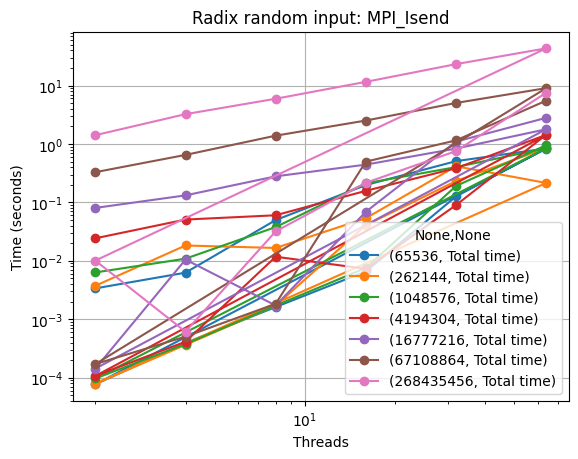

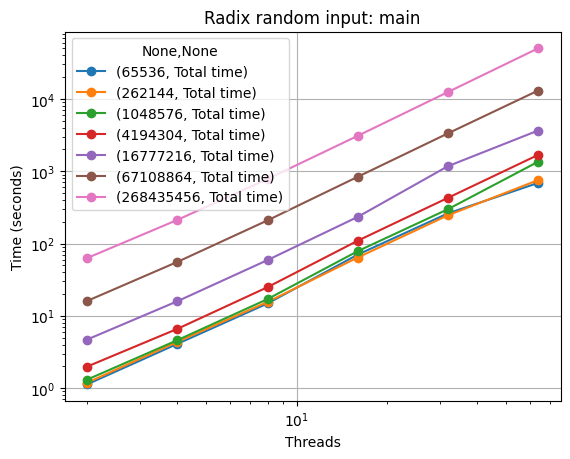

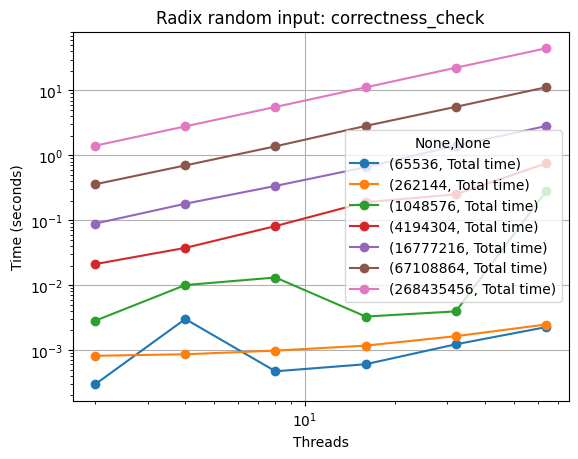

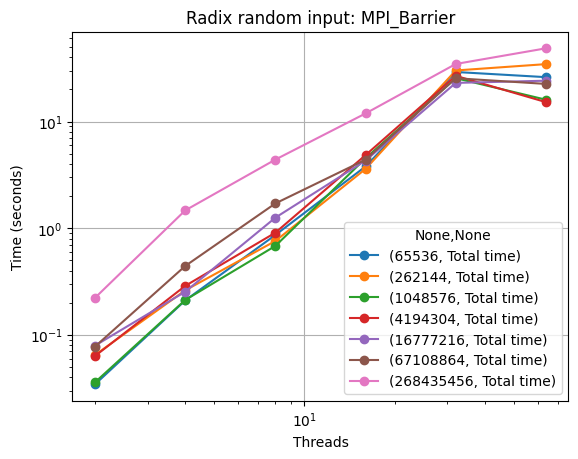

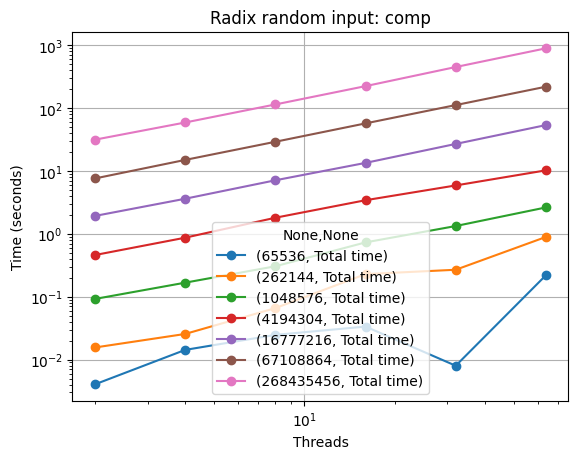

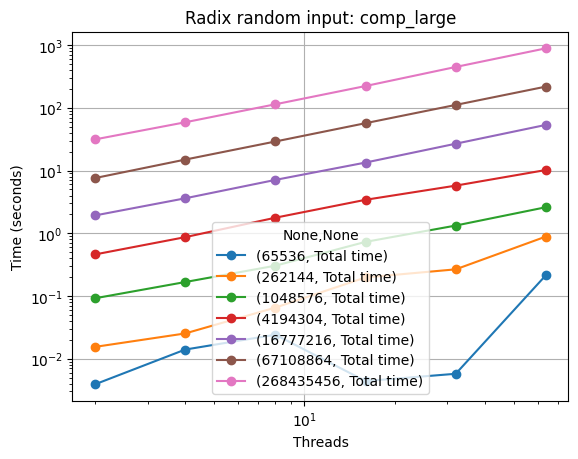

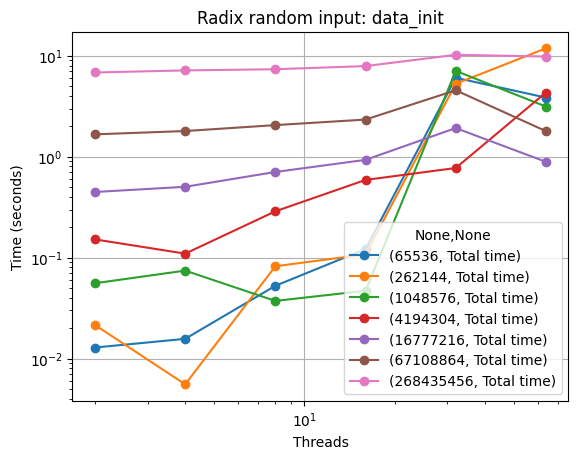

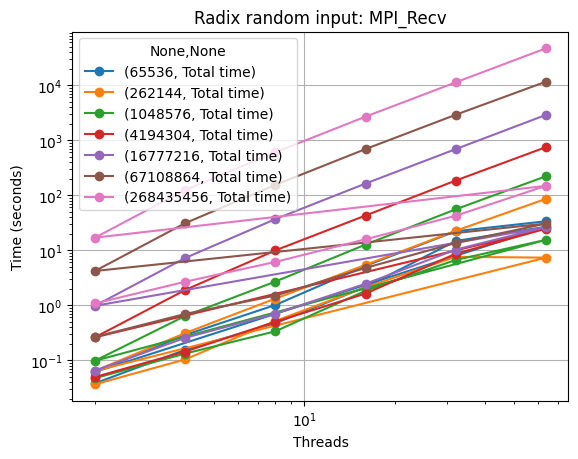

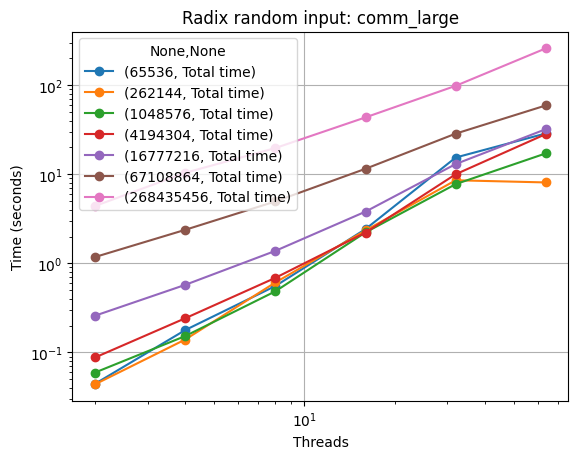

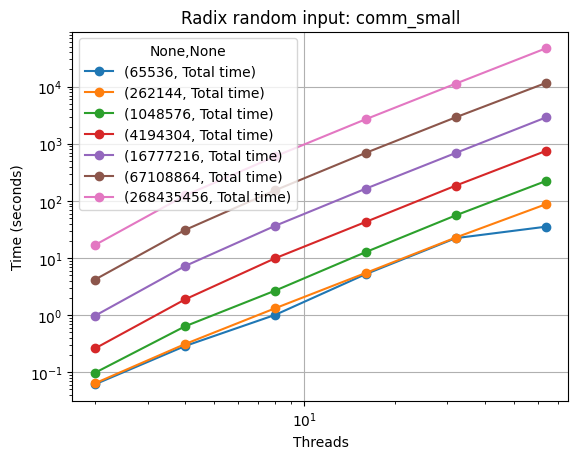

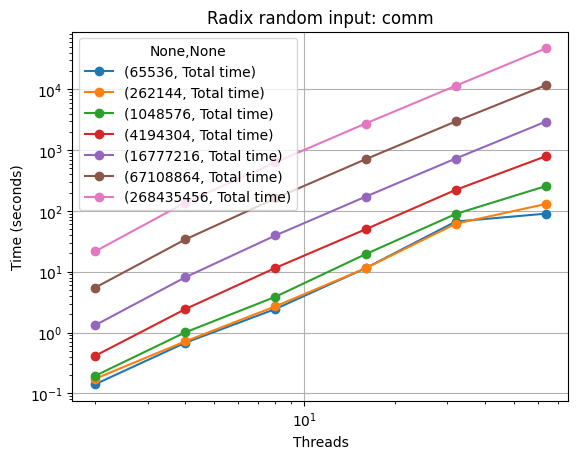

In [17]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=f"Radix {sorted_type} input: {name}",
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )